# Einleitung
- <a href="https://colab.research.google.com/github/gjo-se/images-multiclass/blob/master/notebooks/experiments/00_baseline.ipynb?flush_cache=true" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
- Ziel des Notebooks und des Experiments Kontext und Motivation
- ganz zum Schluss per ChatGPT erstellen


## Prepare Colab

In [1]:
import os
import subprocess

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False
if IN_COLAB:

    repo_url = "https://github.com/gjo-se/images-multiclass.git"
    target_dir = "/content"
    notebook_dir = "notebooks/experiments/"

    if not os.path.exists(os.path.join(target_dir, "src")):
        print(f"Cloning repository {repo_url} to {target_dir}/tmp_clone ...")
        subprocess.check_call(["git", "clone", repo_url, f"{target_dir}/tmp_clone"])
        for item in os.listdir(f"{target_dir}/tmp_clone"):
            subprocess.check_call(["mv", f"{target_dir}/tmp_clone/{item}", target_dir])
        subprocess.check_call(["rm", "-rf", f"{target_dir}/tmp_clone"])
    else:
        print(f"Projekt bereits in {target_dir} vorhanden.")

    os.chdir(os.path.join(target_dir, notebook_dir))
    print(f"Changed working directory to {os.getcwd()}")

    from google.colab import drive

    mount_dir = '/content/drive'
    if os.path.ismount(mount_dir):
        drive.flush_and_unmount()

    if os.path.exists(mount_dir) and os.listdir(mount_dir):
        # Falls noch Reste vorhanden sind, alles löschen
        import shutil
        shutil.rmtree(mount_dir)
        os.makedirs(mount_dir)

    drive.mount(mount_dir)

    DATA_DIR = "/content/drive/MyDrive/datasets/tfds_cache"
    os.makedirs(DATA_DIR, exist_ok=True)

else:
    DATA_DIR = None
    print("clone_and_cd_repo() wird nur auf Google Colab ausgeführt.")

print(f"DATA_DIR: {DATA_DIR}")

clone_and_cd_repo() wird nur auf Google Colab ausgeführt.
DATA_DIR: None


# Imports & Setup


In [2]:
from src.data import Dataset
from src.eda import EDA
from src.log import SuppressTFLogs
from src.setup import Environment

## Setup

In [3]:
Environment().setup();

Notebook last run (end-to-end): 2026-01-31 18:14:56.374168
TensorFlow Version: 2.20.0


# Dataset


## Load Dataset

In [4]:
DATASET_NAME = "food101"
ds = Dataset()
ds.load_dataset(DATASET_NAME, _only_on_colab=False, _data_dir=DATA_DIR)

Load dataset https://www.tensorflow.org/datasets/catalog/food101


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 tfds.core.DatasetInfo(
     name='food101',
     full_name='food101/2.0.0',
     description="""
     This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
     """,
     homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
     data_dir='/Users/gregoryjodaily/tensorflow_datasets/food101/2.0.0',
     file_format=tfrecord,
     download_s

## Explore Data

In [5]:
eda = EDA(ds)

### Dataset

In [6]:
features_dict = eda.show_features_dict()
features_dict

,Attribut,Wert
0,name,food101
1,full_name,food101/2.0.0
2,size,4.65 GiB
3,features,"(image, label)"
4,supervised_keys,"(image, label)"
5,disable_shuffling,False


In [7]:
eda.show_features()
eda.show_splits()
eda.show_data_dir()
eda.show_sample_classes()


Features:
  image: Image(shape=(None, None, 3), dtype=uint8)
  label: ClassLabel(shape=(), dtype=int64, num_classes=101)

Splits:
  train: <SplitInfo num_examples=75750, num_shards=32>
  validation: <SplitInfo num_examples=25250, num_shards=16>

Data Dir:
  /Users/gregoryjodaily/tensorflow_datasets/food101/2.0.0

Sample Classes:
  ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


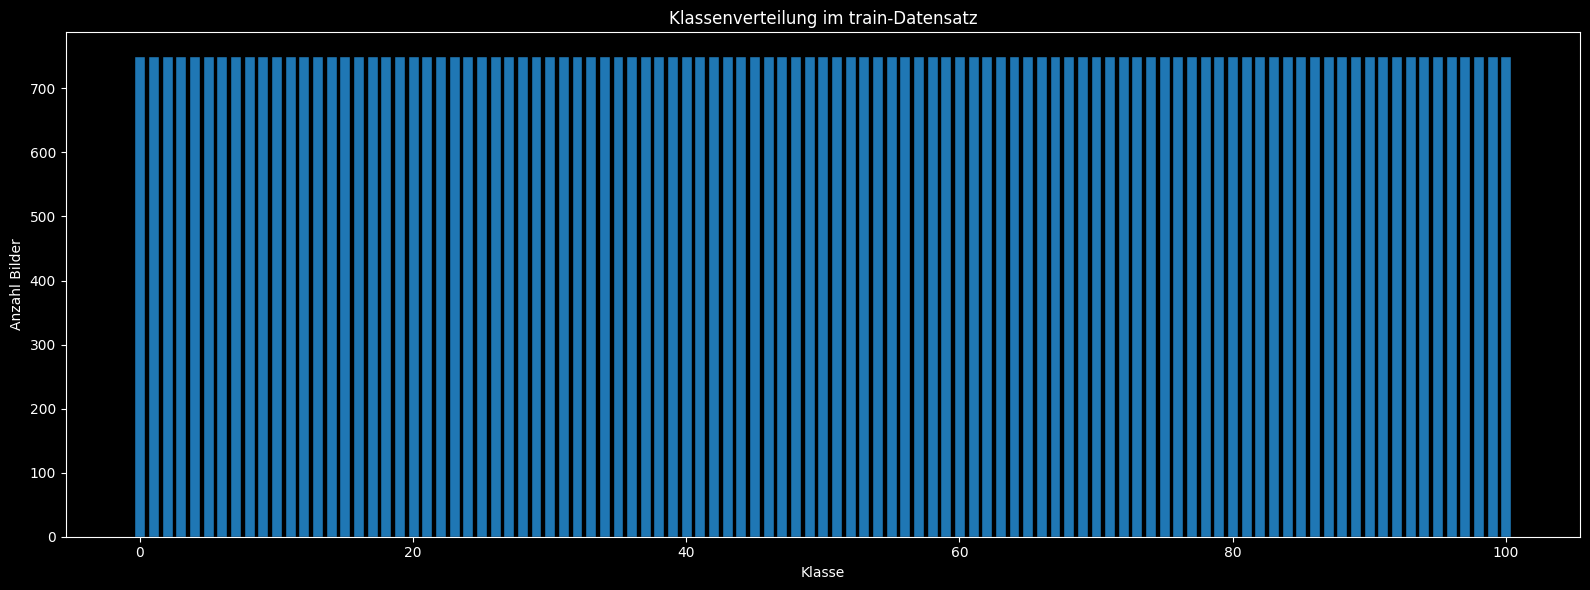

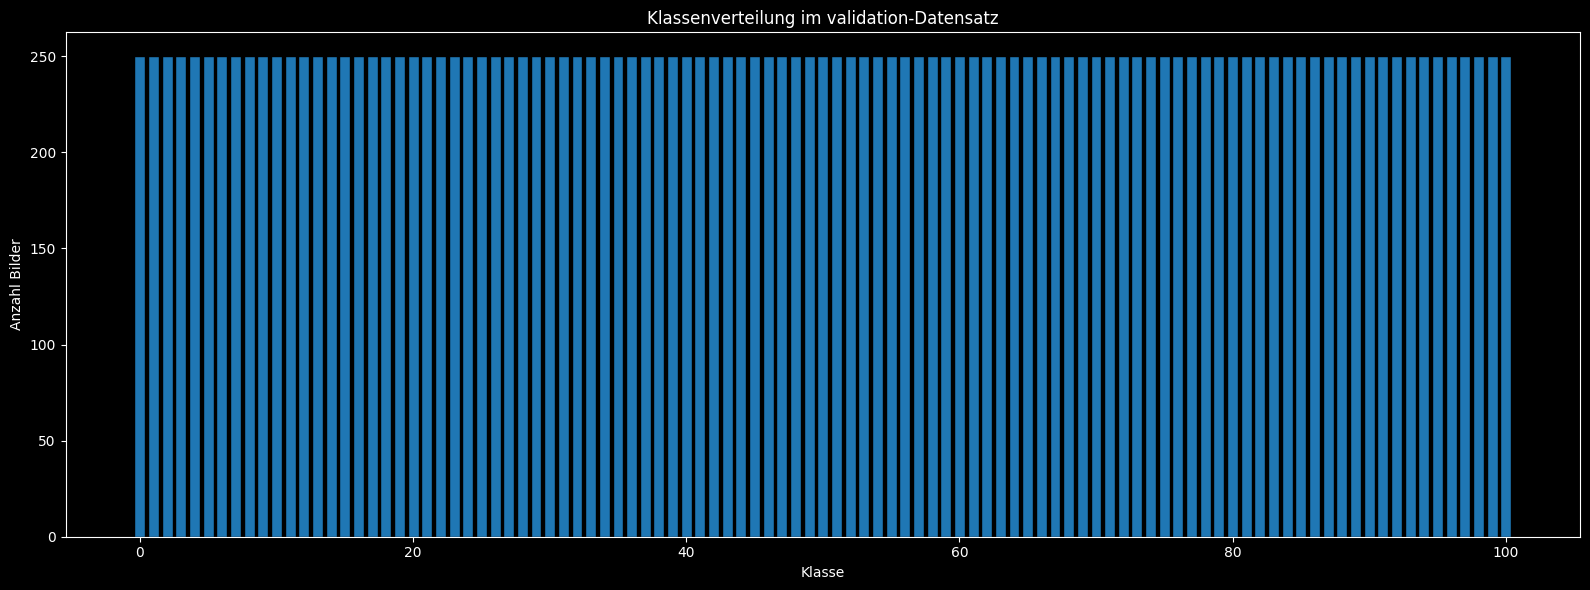

In [8]:
with SuppressTFLogs():
    eda.show_class_distribution("train");
    eda.show_class_distribution("validation");

### Sample Group

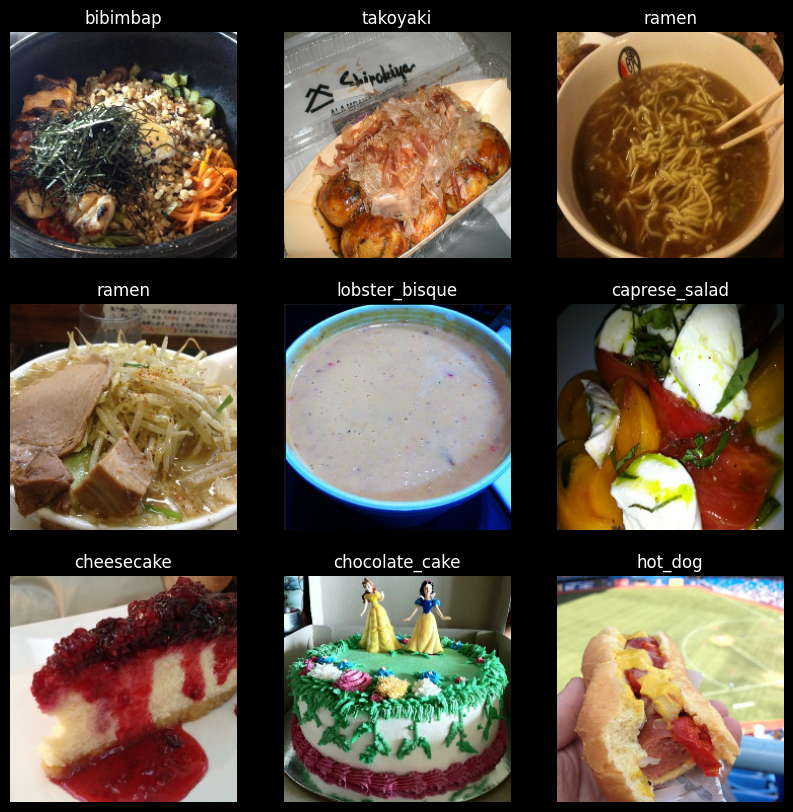

,Shape,dtype,Class name tensor,Class name string,Min,Max
0,"(224, 224, 3)",float32,7,bibimbap,0,255
1,"(224, 224, 3)",float32,97,takoyaki,0,255
2,"(224, 224, 3)",float32,81,ramen,0,255
3,"(224, 224, 3)",float32,81,ramen,0,255
4,"(224, 224, 3)",float32,60,lobster_bisque,0,255
5,"(224, 224, 3)",float32,13,caprese_salad,0,255
6,"(224, 224, 3)",float32,16,cheesecake,0,255
7,"(224, 224, 3)",float32,21,chocolate_cake,0,255
8,"(224, 224, 3)",float32,55,hot_dog,0,255


In [9]:
eda.show_random_samples(_count=9)

## Preprocess Data

In [11]:
ds.preprocess_data("train")
ds.preprocess_data("test")


# Modellierung
Definition und Visualisierung des Modells
Kompilieren des Modells (Loss, Optimizer, Metriken)


# Training
Training des Modells mit Trainingsdaten
Visualisierung des Trainingsverlaufs (Loss, Accuracy)


# Evaluation
Bewertung des Modells auf Validierungs- und Testdaten
Darstellung von Metriken und ggf. Confusion Matrix


# Ergebnisse und Interpretation
Zusammenfassung der wichtigsten Erkenntnisse
Diskussion von Stärken, Schwächen und möglichen Verbesserungen


# Speicherung und Laden von Modellen
Speichern des trainierten Modells
Laden und Testen des gespeicherten Modells


# Fazit und Ausblick
Kurzes Fazit und mögliche nächste Schritte


# Anhang
Zusätzliche Visualisierungen, Code-Snippets oder Referenzen